# Plotting with Matplotlib

Needs to be imported before use:

```python
import matplotlib.pyplot as plt
```

***
## Line plots

- Simplest plotting function is [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
- Need to specify $y$-values, $x$-values are optional

*Example: plot list of y-values*

*Example: plot y-values vs. x-values*

*Example: plot multiple lines in one figure*


#### Colors (see [here](https://matplotlib.org/stable/tutorials/colors/colors.html) for details):

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

#### Line styles

-   `-` solid line
-   `--` dashed line
-   `-.` dash-dotted line
-   `:` dotted line

#### Markers (see [here](https://matplotlib.org/stable/api/markers_api.html) for more):

- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

*Example: plotting with multiple calls to `plot()`*

*Example: granular control over plot styles*

- `c` or `color`
- `ls` or `linestyle`
- `lw` or `linewidth`
- `marker`
- `ms` or `markersize`
- `alpha` (for transparency)

Details: See _Other Parameters_ section in [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>REALRATE.csv</TT> and <TT>FEDFUNDS.csv</TT> into two different DataFrames.
        The files contain the 1-year real interest rate and the Federal Funds rate at monthly frequency.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Plot the <TT>REALRATE</TT> using a blue dashed line with line width 0.5 and <TT>FEDFUNDS</TT> using an orange line with line width 0.75 in the <i>same</i> figure.</li>
</ol>
</div>

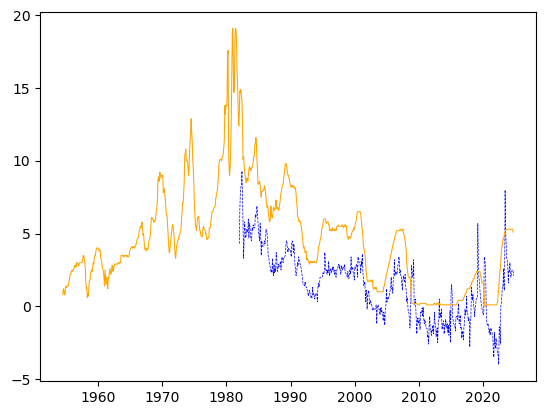

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '/Users/andreas/NHH/tech2-local/TECH2-H24/data/FRED'

file1 = f'{DATA_PATH}/REALRATE.csv'
file2 = f'{DATA_PATH}/FEDFUNDS.csv'

df1 = pd.read_csv(file1, parse_dates=['DATE'], index_col='DATE')
df2 = pd.read_csv(file2, parse_dates=['DATE'],index_col='DATE')

plt.plot(df1, color='blue', linestyle='--', lw='0.5')
plt.plot(df2, color='orange', linestyle='-', lw='0.75')


In [75]:
df2.value_counts()


FEDFUNDS
0.1         75
0.2         32
5.3         30
3.0         29
5.2         26
            ..
11.9         1
12.0         1
9.1          1
12.6         1
12.4         1
Name: count, Length: 139, dtype: int64

***
## Scatter plots

- Plot a sequence of $y$-values against a sequence of $x$-values
- Optional: Assign colors or marker sizes to each individual point
- See [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) 

*Example: Randomly generated scatter plot*

In [76]:
import numpy as np

xvalues = np.linspace(0, 1.0, 50)

rng = np.random.default_rng(123)

yvalues = rng.random(len(xvalues))

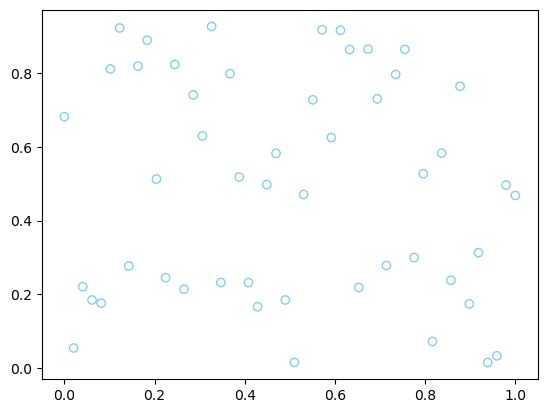

In [77]:
plt.scatter(xvalues, yvalues, edgecolors='skyblue', color='none')

*Example: Set individual marker sizes*

In [78]:
sizes = rng.random(len(yvalues))

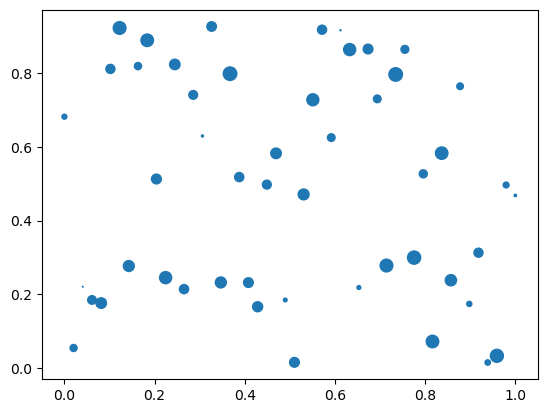

In [79]:
plt.scatter(xvalues, yvalues, s = sizes*100)


<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>REALRATE.csv</TT> and <TT>FEDFUNDS.csv</TT> into two different DataFrames.
        The files contain the 1-year real interest rate and the Federal Funds rate at monthly frequency.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Create a scatter plot of <TT>REALRATE</TT> (on the y-axis) against <TT>FEDFUNDS</TT> (on the x-axis).
    Specify the arguments <TT>edgecolors='blue'</TT> and <TT>color='none'</TT> to plot the data as blue rings.
    <br/>
    <i>Hint:</i> <TT>scatter()</TT> requires the arguments to be of equal length, which is not the case here.
    Restrict the data to the same time period, for example by using <TT>join(..., how='inner')</TT>.
    </li>
</ol>
</div>

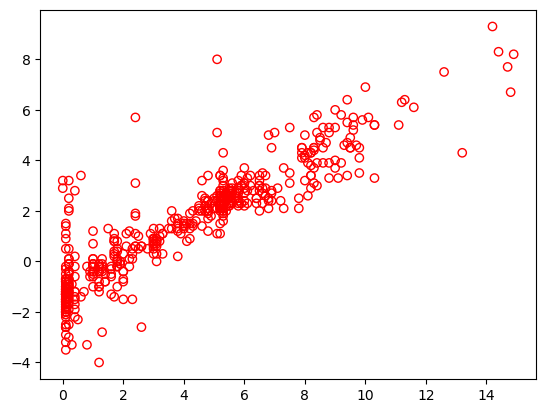

In [86]:
df = df1.join(df2, how='inner')

plt.scatter(df['FEDFUNDS'], df['REALRATE'], edgecolors='r', color='none')

***
## Plotting categorical data

- Discrete (small) number of values on $x$-axis
- Vertical bars: [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
- Horizontal bars: [`barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html)

*Example: Largest municipalities in Norway*

- Categories: 'Oslo', 'Bergen', 'Trondheim', 'Stavanger'
- Population: 717710, 291940,  214565, 149048

*Example: Horizontal bar chart*

In [88]:
municipalities= ['Oslo', 'Bergen', 'Trondheim', 'Stavanger']
population = np.array([717710, 291940,  214565, 149048]) / 1000

Text(0.5, 1.0, 'Population')

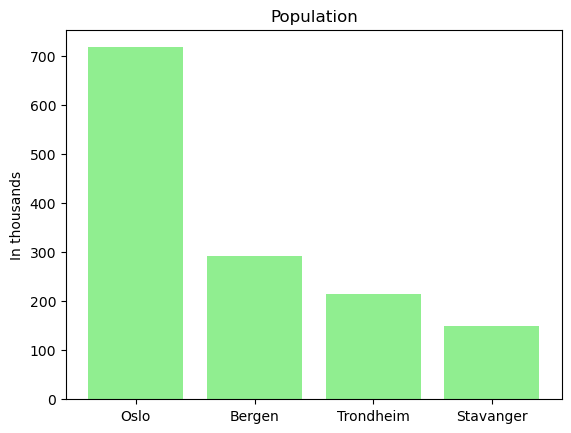

In [97]:
plt.bar(municipalities,population, color='lightgreen')
plt.ylabel('In thousands')
plt.title('Population')

Text(0.5, 1.0, 'Population')

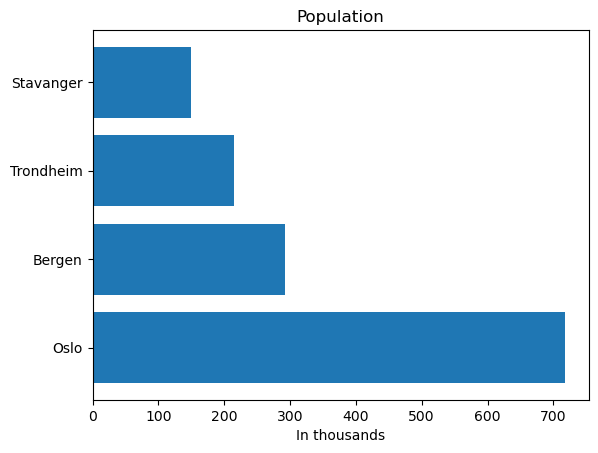

In [93]:
plt.barh(municipalities,population)
plt.xlabel('In thousands')
plt.title('Population')

***
## Adding labels and annotations

-   Titles: [`title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) 
    and [`suptitle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) 
-   Axes labels: 
    [`xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) 
    and [`ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)
-   Legend:
    [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
-   Add annotations (text): [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

*Example: Simple plot with title, labels, etc.*

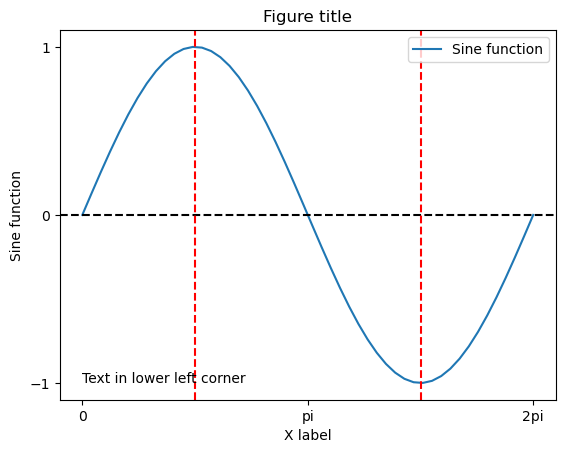

In [113]:


xvalues = np.linspace(0, 2*np.pi,50)
yvalues = np.sin(xvalues)

plt.plot(xvalues, yvalues)
plt.xlabel('X label')
plt.ylabel('Sine function')
plt.title('Figure title')

plt.xticks([0, np.pi, 2*np.pi], ['0', 'pi', '2pi'])
plt.yticks([-1,0,1])
plt.text(0,-1, 'Text in lower left corner')
plt.legend(['Sine function'], loc='upper right')

plt.axhline(0, ls='--', color='black')

# Indicate the max location

plt.axvline(np.pi/2, ls='--',color='red')
plt.axvline(3* np.pi/2, ls='--',color='red')


***
## Plot limits, ticks and tick labels

-   Plot limits:
    [`xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and 
    [`ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)
-   Ticks and tick labels:
    [`xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) 
    or [`yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html)


*Example: Plot sine function*

***

## Adding straight lines

- Horizontal line: [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)
- Vertical line: [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)
- Generic line: [`axline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html#matplotlib.pyplot.axline)

*Example: Adding horizontal and vertical lines to sine plot*

***
## Object-oriented interface

-   So far: "Traditional" interface inspired by Matlab
-   Object-oriented approach: Operate on attributes of [`Figure`](https://matplotlib.org/stable/api/figure_api.html) and 
    [`Axes`](https://matplotlib.org/stable/api/axes_api.html)
-   Need to obtain `Figure` and `Axes` objects by calling 
    [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
-   Use methods of `Axes` object to plot data, e.g., 
    [`Axes.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)

*Example: Repeat labels/annotation example with OO interface*

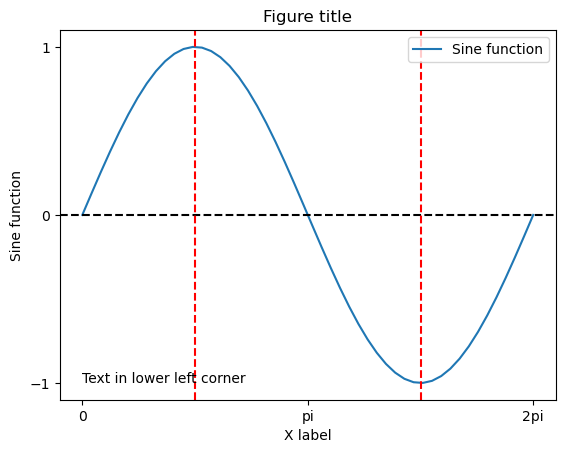

In [114]:


xvalues = np.linspace(0, 2*np.pi,50)
yvalues = np.sin(xvalues)

fig, ax = plt.subplots()

ax.plot(xvalues, yvalues)
ax.set_xlabel('X label')
ax.set_ylabel('Sine function')
ax.set_title('Figure title')

ax.set_xticks([0, np.pi, 2*np.pi], ['0', 'pi', '2pi'])
ax.set_yticks([-1,0,1])
ax.text(0,-1, 'Text in lower left corner')
ax.legend(['Sine function'], loc='upper right')

ax.axhline(0, ls='--', color='black')

# Indicate the max location

ax.axvline(np.pi/2, ls='--',color='red')
ax.axvline(3* np.pi/2, ls='--',color='red')


***
## Working with multiple plots (axes)

- Much more convenient using object-oriented interface
- Specify desired number of rows & columns when calling [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

*Example: Create a plot with 2 panels*

*Example: Create a figure with 2 rows and 2 columns*

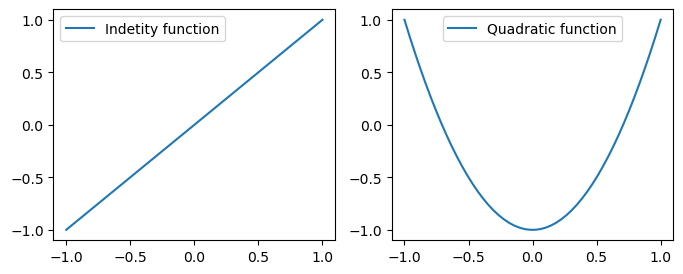

In [121]:
nrows = 1
ncols = 2

xvalues = np.linspace(-1,1,50)

fig, axes = plt.subplots(nrows, ncols, figsize=(8,3))

yvalues = xvalues
axes[0].plot(xvalues, yvalues, label='Indetity function')
axes[0].legend()

yvalues=2*xvalues**2-1
axes[1].plot(xvalues,yvalues, label='Quadratic function')
axes[1].legend()

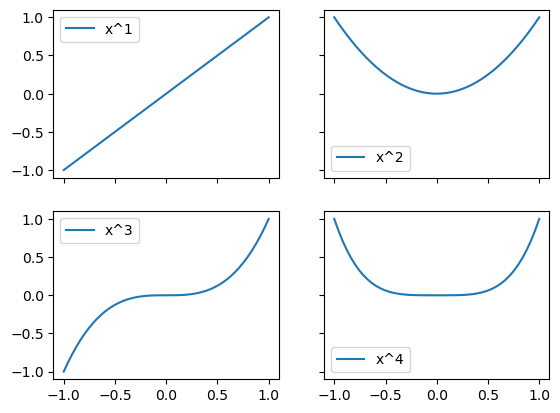

In [127]:
nrows = 2 
ncols = 2

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True)

exponent = 1
for i in range (nrows):
    for j in range(ncols):
        ax = axes[i, j]
        yvalues = xvalues**exponent
        ax.plot(xvalues,yvalues, label=f'x^{exponent}')
        ax.legend()

        exponent +=1

<div class="alert alert-info">
<h3> Your turn</h3>
Create a figure with 3 columns (on a single row) and plot the following functions
on the interval [0, 6]:
<ol>
    <li>Subplot 1: y = sin(x)</li>
    <li>Subplot 2: y = sin(2*x)</li>
    <li>Subplot 3: y = sin(4*x)</li>
</ol>

<i>Hint:</i> The sine function can be imported from NumPy as <TT>np.sin()</T>.
</div>

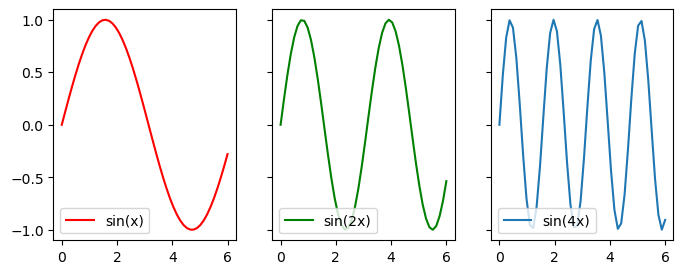

In [150]:
nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(8,3))

x = np.linspace(0, 6, 50)


axes[0].plot(x, np.sin(x), color='r', label='sin(x)')

axes[1].plot(x, np.sin(2*x), color='g', label='sin(2x)')

axes[2].plot(x, np.sin(4*x), label='sin(4x)')


for i in range(3):
    axes[i].legend(loc ='lower left')

In [152]:
for i, ax in enumerate(axes):
    a = 2*i
    axes[i].plot(x, np.sin(a* x), color='r', label=f'sin({a} * X)')
    axes[i].legend(loc ='lower left')


***
# Plotting with pandas

## Bar charts

- Created with [`plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

*Example: Plot bar chart of 15 largest municipalities*

-   Read in data from `population_norway.csv`

*Example: Plot bar chart of 15 largest municipalities w/o pandas*

In [157]:
DATA_PATH = '/Users/andreas/NHH/tech2-local/TECH2-H24/data/'

file = f'{DATA_PATH}/population_norway.csv'
df = pd.read_csv(file)

In [158]:
df = df.loc[:15]
df.head()

,Municipality,Population
0,Oslo,717710
1,Bergen,291940
2,Trondheim,214565
3,Stavanger,149048
4,Bærum,130921


<Axes: xlabel='Municipality', ylabel='Population'>

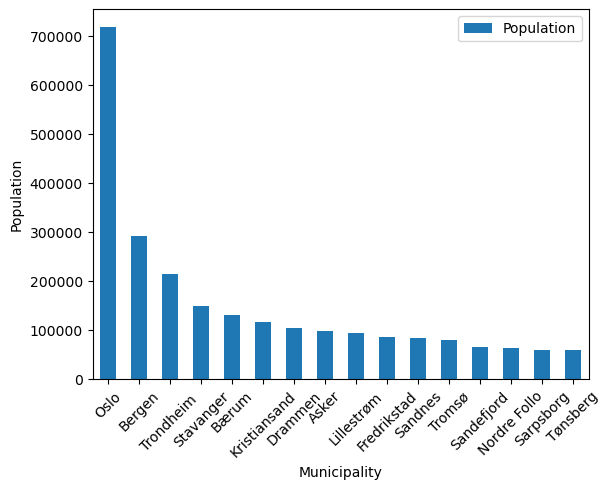

In [161]:
df.plot.bar(x='Municipality', y='Population', rot=45, ylabel='Population')

***
## Plotting time series data

- Created with [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 

*Example: plot US unemployment rate*

-   Use column `UNRATE` from file `FRED.csv`

In [164]:
file = f'{DATA_PATH}/FRED.csv'

df = pd.read_csv(file)
df.head(5)

,Year,GDP,CPI,UNRATE,FEDFUNDS
0,1954,2877.7,26.9,5.6,1.0
1,1955,3083.0,26.8,4.4,1.8
2,1956,3148.8,27.2,4.1,2.7
3,1957,3215.1,28.1,4.3,3.1
4,1958,3191.2,28.9,6.8,1.6


<Axes: title={'center': 'Unemployment rate'}, xlabel='Year', ylabel='percent'>

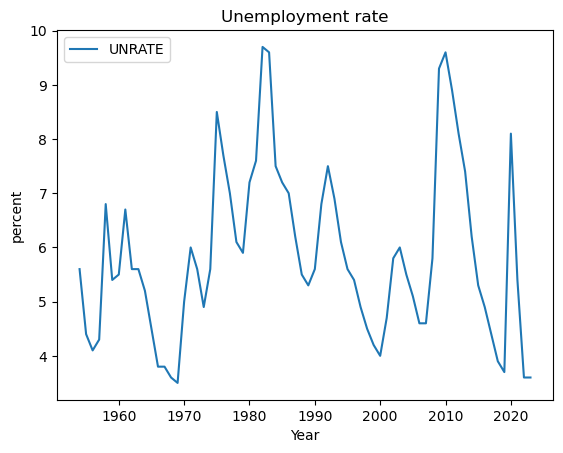

In [168]:
df.plot.line(x='Year', y='UNRATE', ylabel='percent', title ='Unemployment rate')

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the macroeconomic time series data from <TT>FRED_monthly_all.csv</TT>.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'])</TT> to automatically set parse strings as dates.
        </li>
    <li>Create a line plot, showing both the unemployment rate <TT>UNRATE</TT>
        and the inflation rate <TT>INFLATION</TT> in a single graph.
    </li>
</ol>
</div>

In [171]:
file = f'{DATA_PATH}/FRED/FRED_monthly_all.csv'

df = pd.read_csv(file, parse_dates=['DATE'])
df.head()

,DATE,CPI,INFLATION,UNRATE,REALRATE,FEDFUNDS,LFPART
0,1947-01-01,21.5,NaN,NaN,NaN,NaN,NaN
1,1947-02-01,21.6,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,22.0,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,22.0,NaN,NaN,NaN,NaN,NaN
4,1947-05-01,22.0,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Year', ylabel='Percent'>

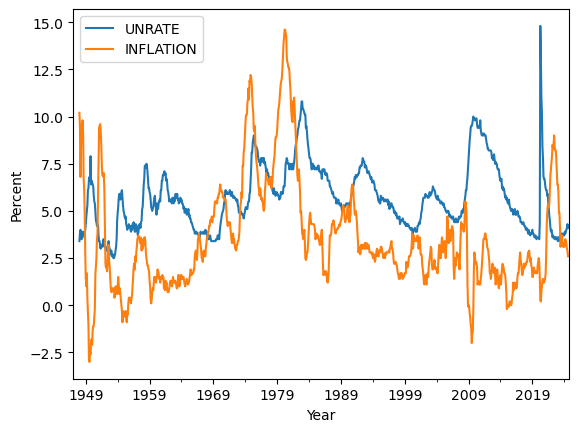

In [174]:
df.plot.line(x='DATE', y=['UNRATE', 'INFLATION'], xlabel='Year', ylabel='Percent')

***
## Scatter plots

-   Created with [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
-   Can adjust style with many arguments accepted by Matplotlib's 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)
-   Use [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)
    to create pairwise scatter plots for all columns in `DataFrame`

*Example: Plot US inflation vs. unemployment*

-   Use `Inflation` and `UNRATE` from `FRED.csv`

<Axes: xlabel='UNRATE', ylabel='INFLATION'>

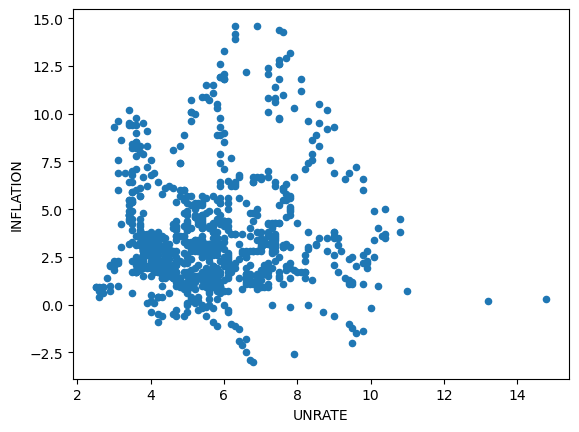

In [176]:
df.plot.scatter('UNRATE', 'INFLATION')

*Example: 3-by-3 plot with `scatter_matrix()`* 

-   Use `GDP_growth`, `Inflation` and `UNRATE` from `FRED.csv`